<a href="https://colab.research.google.com/github/asegura4488/CienciaDatos/blob/main/Semana3/Sesion6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('/content/drive/MyDrive/ColabNotebooks/Cursos/CursoCienciaDatos/Semana3')
!ls

Datos  Sesion5_1.ipynb	Sesion5.ipynb  Sesion6.ipynb


In [6]:
data = pd.read_csv('Datos/BancoFinal.csv')
data.shape

(45192, 17)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45192 entries, 0 to 45191
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45192 non-null  int64  
 1   job        45192 non-null  object 
 2   marital    45192 non-null  object 
 3   education  45192 non-null  object 
 4   default    45192 non-null  object 
 5   balance    45192 non-null  float64
 6   housing    45192 non-null  object 
 7   loan       45192 non-null  object 
 8   contact    45192 non-null  object 
 9   day        45192 non-null  int64  
 10  month      45192 non-null  object 
 11  duration   45192 non-null  float64
 12  campaign   45192 non-null  int64  
 13  pdays      45192 non-null  float64
 14  previous   45192 non-null  int64  
 15  poutcome   45192 non-null  object 
 16  y          45192 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [8]:
col_cate = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']

In [9]:
col_num = ['age','balance','day','duration','campaign','pdays','previous']

In [11]:
#fig, ax = plt.subplots(len(col_cate), 1, figsize=(8,45))
#fig.subplots_adjust(hspace=0.5)

#for i, col in enumerate(col_cate):
#  sns.countplot(x=col, data=data, ax=ax[i], hue='education')
#  ax[i].set_ylabel(col)
#  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)

In [12]:
# Quitar columnas no relevantes
irrelevantes = ['contact','month']
data.drop(columns=irrelevantes, inplace=True)
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [13]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45192.00000,45192.000000,45192.000000,45192.000000,45192.000000,45192.000000,45192.000000
mean,40.93636,1374.054766,15.807554,258.097871,2.763564,40.176159,0.574128
std,10.61844,3924.295685,8.322608,257.349651,3.097019,100.104534,1.907892
min,18.00000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.00000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.00000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.00000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.00000,527532.000000,31.000000,4918.000000,63.000000,871.000000,58.000000


In [14]:
col_num = ['age','balance']
col_num

['age', 'balance']

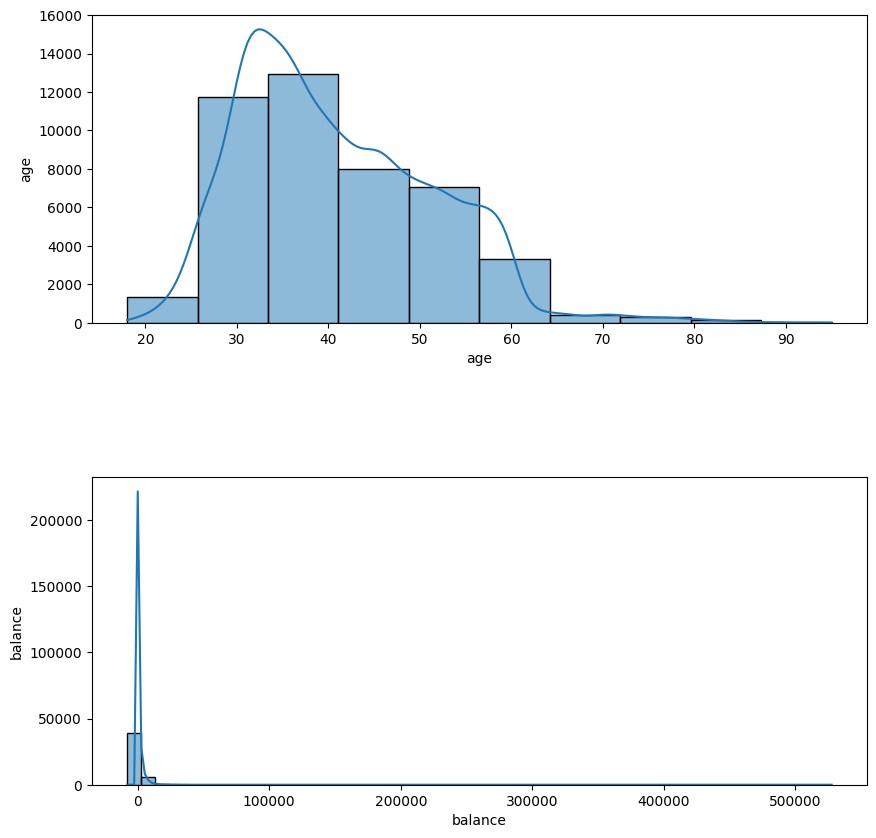

In [17]:
fig, ax = plt.subplots(len(col_num), 1, figsize=(10,10))
fig.subplots_adjust(hspace=0.5)

Nbins = [10,50]

for i, col in enumerate(col_num):
  sns.histplot(x=col, data=data, ax=ax[i], bins=Nbins[i], kde=True)
  ax[i].set_ylabel(col)

In [21]:
from scipy.stats import gaussian_kde
age = data['age'].values
kde = gaussian_kde(age)

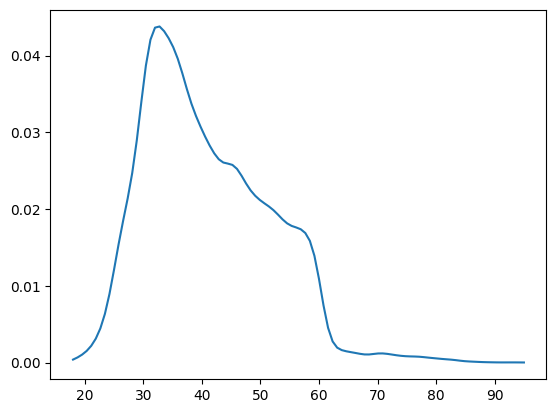

In [30]:
x_vals = np.linspace(np.min(age),np.max(age),100)
pdf = kde(x_vals)
plt.plot(x_vals,pdf)

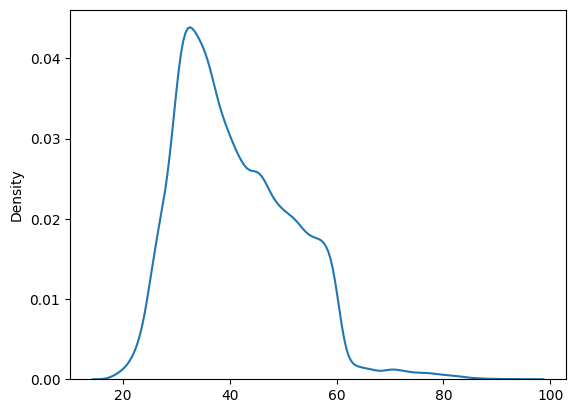

In [33]:
ax = sns.kdeplot(x=age, fill=False)

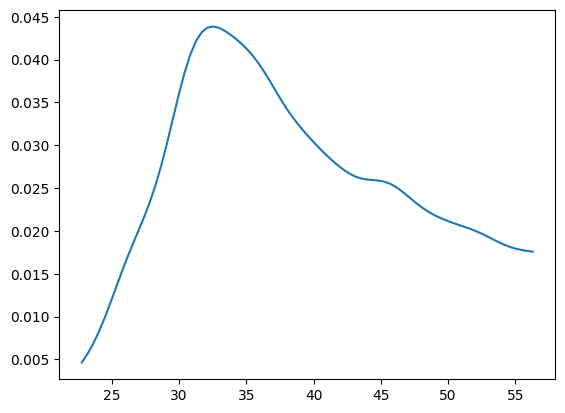

In [35]:
# Quiero extraer los puntos de kde
line = ax.lines[-1]
x,y = line.get_data()
plt.plot(x[20:100],y[20:100])

In [31]:
from scipy.integrate import quad
prob, error = quad(kde, 0, 100)
prob

0.9999999986804571

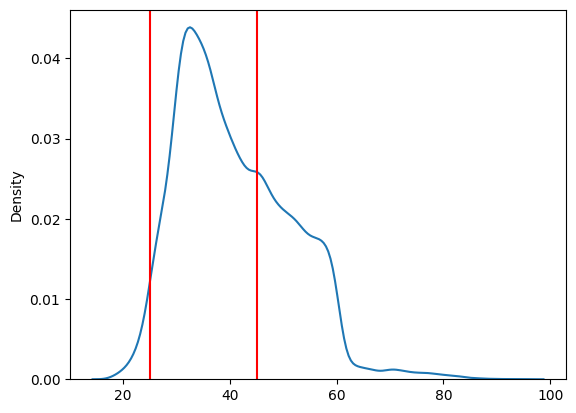

In [39]:
# Probabilidad de tener una persona entre 25 y 45 años
ax = sns.kdeplot(x=age, fill=False)
plt.axvline(x=25,color='r')
plt.axvline(x=45,color='r')

In [78]:
prob, error = quad(kde, 25, 45)
prob

0.6399167538045842

In [41]:
prob, error = quad(kde, 60, 100)
prob

0.03669902692751225

In [61]:
# Ultimo metodo, métodos MonteCarlo
samples = kde.resample(100000)
#plt.hist(samples[0])

In [62]:
prob_mc = np.mean( (samples > 25) & (samples < 45) )
prob_mc

np.float64(0.63833)

In [63]:
samples

array([[32.11042381, 31.37541193, 43.82196387, ..., 39.29790816,
        38.46372526, 32.27552939]])

<Axes: ylabel='Density'>

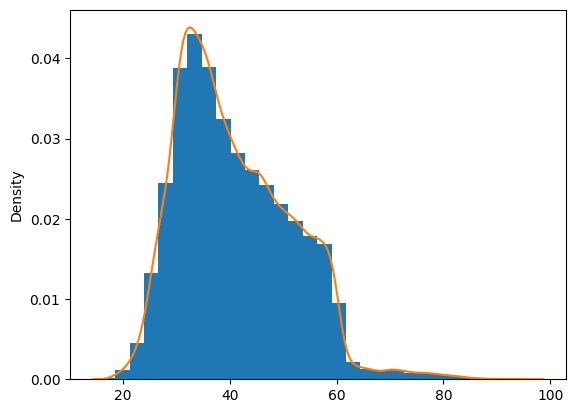

In [64]:
plt.hist(samples[0],density=True,bins=30)
sns.kdeplot(x=age, fill=False)

In [65]:
# Definamos el mapa para la variable predictora
Dict = {'yes':1, 'no':0}
mapa = data['y'].map(Dict)
data['NewY'] = mapa

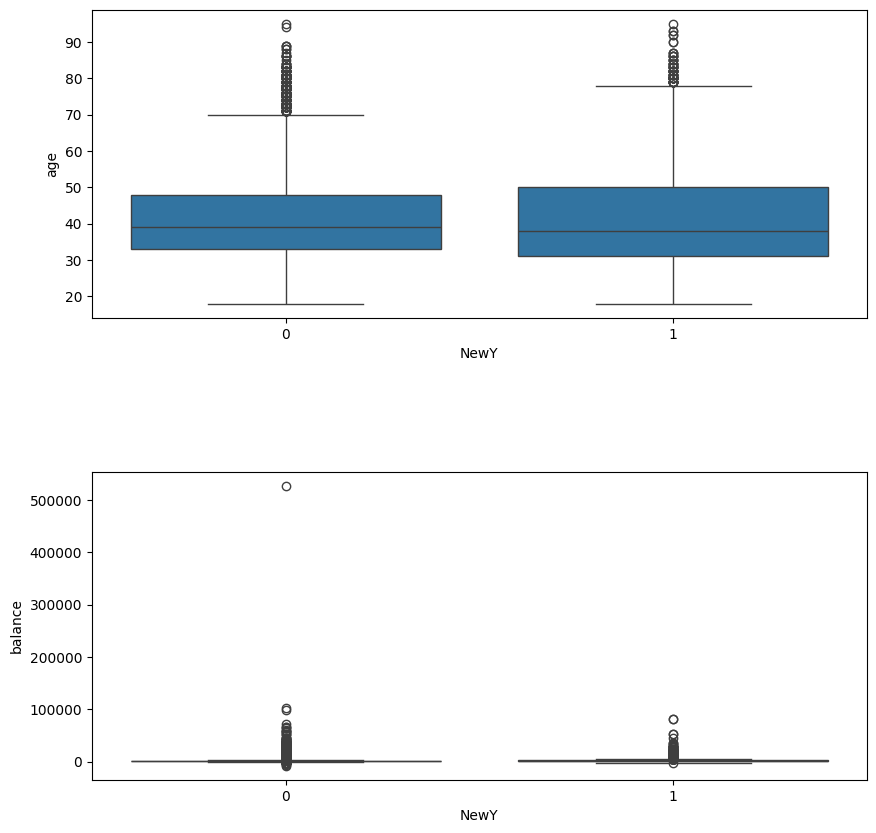

In [68]:
fig, ax = plt.subplots(len(col_num), 1, figsize=(10,10))
fig.subplots_adjust(hspace=0.5)

Nbins = [10,50]

for i, col in enumerate(col_num):
  sns.boxplot(x='NewY', y=col, data=data, ax=ax[i])
  ax[i].set_ylabel(col)
  ax[i].set_xlabel('NewY')

In [69]:
# Parece que la edad no influye en la adquisión del producto
# Parace que el dinero en cuenta no influye

In [70]:
Grupo1 = data.groupby('age')['NewY'].mean().rename('Tasa').reset_index()
Grupo1

,age,Tasa
0,18,0.583333
1,19,0.314286
2,20,0.300000
3,21,0.278481
4,22,0.310078
...,...,...
72,90,1.000000
73,92,1.000000
74,93,1.000000
75,94,0.000000


<Axes: xlabel='age', ylabel='Tasa'>

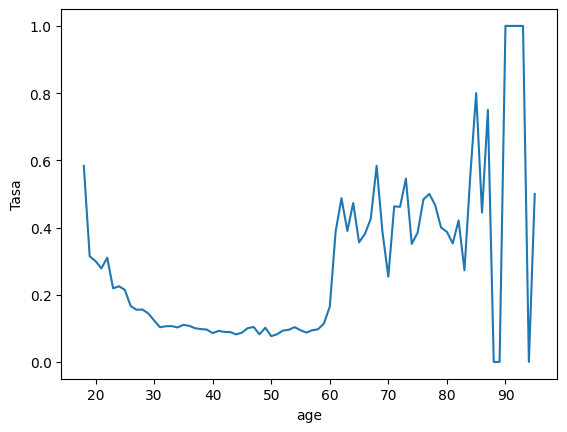

In [71]:
sns.lineplot(x='age', y='Tasa', data=Grupo1)

In [72]:
# Se nota una dependencia entre la tasa y la edad de la persona
# Vamos a mirar los rangos

In [73]:
data.loc[:,'GruposEdad'] = "18-25"
data.loc[ (data['age']>25) & (data['age']<60), 'GruposEdad'   ] = "25-60"
data.loc[ (data['age']>60) & (data['age']<100), 'GruposEdad'   ] = "60-100"

In [77]:
#data

In [74]:
Grupo2 = data.groupby('GruposEdad')['NewY'].mean().rename('Tasa').reset_index()
Grupo2

,GruposEdad,Tasa
0,18-25,0.216468
1,25-60,0.103770
2,60-100,0.422072


<Axes: xlabel='GruposEdad', ylabel='Tasa'>

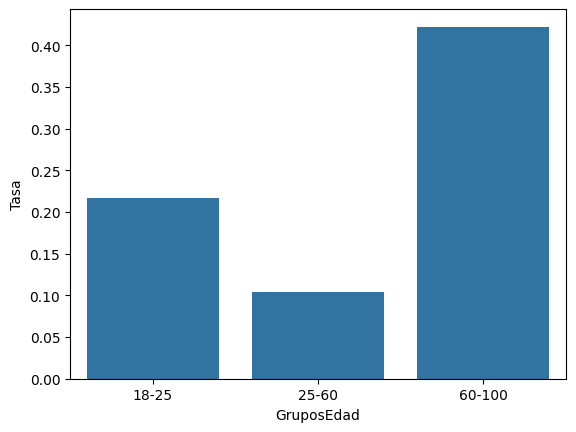

In [75]:
sns.barplot(x='GruposEdad',y='Tasa',data=Grupo2)

<Axes: xlabel='balance', ylabel='Tasa'>

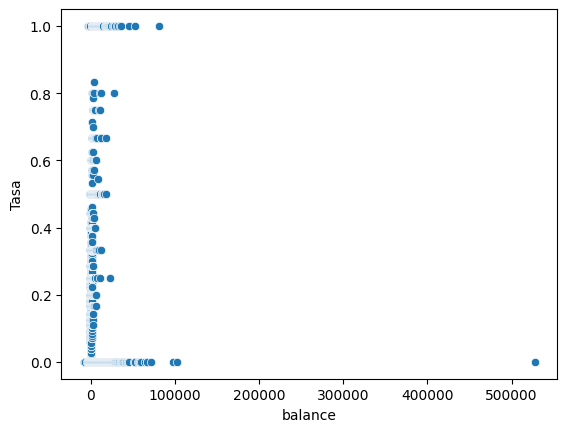

In [81]:
Grupo3 = data.groupby('balance')['NewY'].mean().rename('Tasa').reset_index()
sns.scatterplot(x='balance',y='Tasa',data=Grupo3)

In [83]:
data.loc[:,'GruposBalance'] = "<0"
data.loc[ (data['balance']>0) & (data['balance']< 4000), 'GruposBalance'   ] = "0-4000"
data.loc[ (data['balance']>=4000) & (data['balance']< 8000), 'GruposBalance'   ] = "4000-8000"
data.loc[ (data['balance']>=8000) & (data['balance']< 12000), 'GruposBalance'   ] = "8000-12000"
data.loc[ data['balance']> 12000, 'GruposBalance'   ] = ">12000"

<Axes: xlabel='GruposBalance', ylabel='Tasa'>

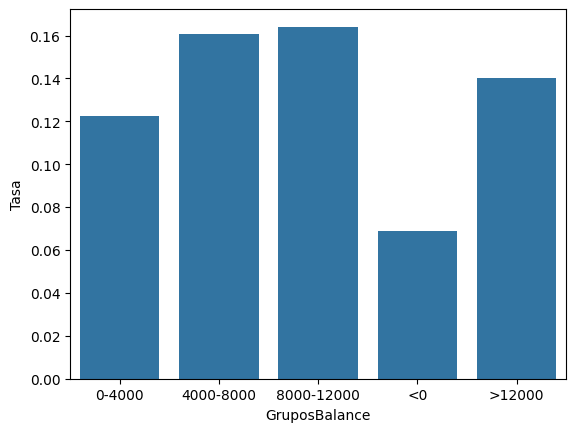

In [84]:
Grupo4 = data.groupby('GruposBalance')['NewY'].mean().rename('Tasa').reset_index()
sns.barplot(x='GruposBalance',y='Tasa',data=Grupo4)

In [85]:
Grupo4.sort_values('Tasa',ascending=True)
Grupo4

,GruposBalance,Tasa
0,0-4000,0.122453
1,4000-8000,0.160933
2,8000-12000,0.164095
3,<0,0.068966
4,>12000,0.140105


In [89]:
Grupo5 = data.groupby('job')['NewY'].mean().rename('Tasa').reset_index()
Grupo5.sort_values('Tasa',ascending=True)
#sns.barplot(x='job',y='Tasa',data=Grupo5)

,job,Tasa
1,blue-collar,0.072684
2,entrepreneur,0.082717
3,housemaid,0.087903
7,services,0.088873
9,technician,0.110497
11,unknown,0.118056
6,self-employed,0.118504
0,administrative,0.122098
4,management,0.137479
10,unemployed,0.155027


In [90]:
Grupo6 = data.groupby('marital')['NewY'].mean().rename('Tasa').reset_index()
Grupo6.sort_values('Tasa',ascending=True)

,marital,Tasa
1,married,0.101165
0,divorced,0.119523
2,single,0.149472


In [91]:
Grupo7 = data.groupby('education')['NewY'].mean().rename('Tasa').reset_index()
Grupo7.sort_values('Tasa',ascending=True)

,education,Tasa
0,primary,0.086157
1,secondary,0.105567
3,unknown,0.135703
2,tertiary,0.150023


In [92]:
Grupo8 = data.groupby('default')['NewY'].mean().rename('Tasa').reset_index()
Grupo8.sort_values('Tasa',ascending=True)

,default,Tasa
1,yes,0.063804
0,no,0.117921


In [93]:
Grupo9 = data.groupby('housing')['NewY'].mean().rename('Tasa').reset_index()
Grupo9.sort_values('Tasa',ascending=True)

,housing,Tasa
1,yes,0.076972
0,no,0.166941


In [94]:
Grupo10 = data.groupby('poutcome')['NewY'].mean().rename('Tasa').reset_index()
Grupo10.sort_values('Tasa',ascending=True)

,poutcome,Tasa
3,unknown,0.091593
0,failure,0.125970
1,other,0.166576
2,success,0.647253


<Axes: xlabel='poutcome', ylabel='NewY'>

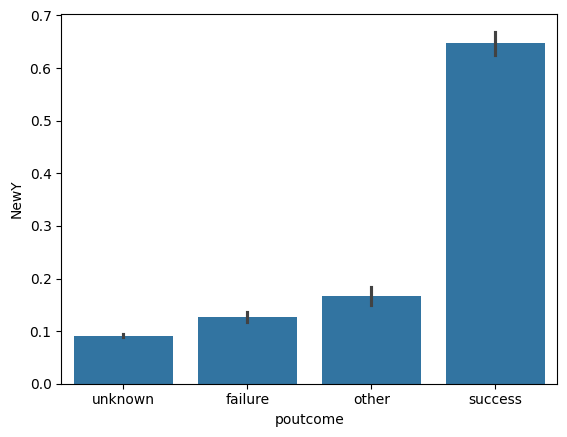

In [95]:
sns.barplot(x='poutcome',y='NewY',data=data)

In [99]:
# Analisis bivariado
def Bivariado(col,orden=None):

  grupo = data.groupby(col)['NewY'].mean().to_frame().reset_index()

  plt.figure(figsize=(6,6))
  ax = sns.pointplot( x=grupo['NewY'], y=grupo[col[0]], hue=grupo[col[1]])

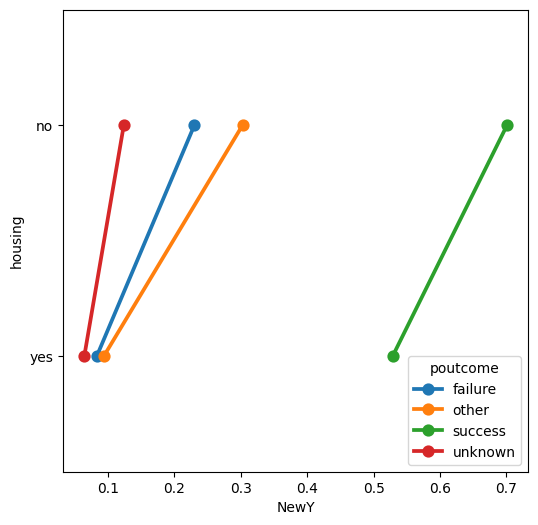

In [105]:
Bivariado(['housing','poutcome'])

In [ ]:
# Conclusiones

#Preferiblmente que haya tenido un producto en el Banco
#Estudiantes, desempleado o jubilado
#Con saldo en cuenta
#QUe no tenga credito hipotecario
